A study of earthquakes in USA (1980-2020)

In [4]:
%matplotlib notebook

In [5]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import time
import copy
from datetime import datetime
from config import gkey
gmaps.configure(api_key=gkey)


In [6]:
#Read in the us large quakes file
us_csv="output_data2/large_quakes_all.csv"
large_quakes=pd.read_csv(us_csv)
#Isolating largest quakes in USA
large_quakes_us = large_quakes.loc[large_quakes['Country']=="US"]
print(len(large_quakes_us))


26


In [7]:
# Configure gmaps od large quakes in USA
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations and convert magnitude to float
locations = large_quakes_us[["Lat", "Lng"]]
magnitude = large_quakes_us["Mag"].astype(float)

 
# Using the template add the earthquake marks to the gmap
info_box_template = """
<dl>
<dt>Place</dt><dd>{Place}</dd>
<dt>Mag</dt><dd>{Mag}</dd>
</dl>
"""
# Store the DataFrame Row
large_quake_info = [info_box_template.format(**row) for index, row in large_quakes_us.iterrows()]

In [8]:
fig = gmaps.figure()
# Create marker layer
markers = gmaps.marker_layer(locations, info_box_content=large_quake_info)

# Add the layer to the map
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
#Combining all quakes of magnitude > 7
data_list= ["output_data2/large_quakes_all.csv",
       "output_data2/strong_quakes_all.csv",
       "output_data2/medium_quakes_all.csv"]
dfs = []
for filename in data_list:
    df= pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df)

# Concatenate all data into one DataFrame
allquakes = pd.concat(dfs, ignore_index=True)
print(len(allquakes))
del allquakes['Unnamed: 0']
allquakes.head()

67584


,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country
0,43.530,146.753,44.0,7.0,754,Kuril Islands,1980-02-23 05:51:03.200,2,23,1980,RU
1,-12.410,166.381,33.0,7.5,865,Santa Cruz Islands,1980-07-08 23:19:19.800,7,8,1980,SB
2,-12.525,165.916,33.0,7.9,960,Santa Cruz Islands,1980-07-17 19:42:23.200,7,17,1980,SB
3,36.195,1.354,10.0,7.3,820,northern Algeria,1980-10-10 12:25:23.500,10,10,1980,DZ
4,-21.890,169.853,33.0,7.2,798,southeast of the Loyalty Islands,1980-10-25 11:00:05.100,10,25,1980,NC


In [10]:
#Get the date info from other columns
allquakes['Date'] = allquakes.apply(lambda x: datetime(
                              x['Year'], x['Month'], x['Day']), axis=1)
allquakes.sort_values(by='Date')
allquakes.head()

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country,Date
0,43.530,146.753,44.0,7.0,754,Kuril Islands,1980-02-23 05:51:03.200,2,23,1980,RU,1980-02-23
1,-12.410,166.381,33.0,7.5,865,Santa Cruz Islands,1980-07-08 23:19:19.800,7,8,1980,SB,1980-07-08
2,-12.525,165.916,33.0,7.9,960,Santa Cruz Islands,1980-07-17 19:42:23.200,7,17,1980,SB,1980-07-17
3,36.195,1.354,10.0,7.3,820,northern Algeria,1980-10-10 12:25:23.500,10,10,1980,DZ,1980-10-10
4,-21.890,169.853,33.0,7.2,798,southeast of the Loyalty Islands,1980-10-25 11:00:05.100,10,25,1980,NC,1980-10-25


In [11]:
#Pick columns required to plot
columns = ['Date', 'Mag']
#From entire dataframe isolate US and reduce columns
quakes_df = allquakes.loc[allquakes["Country"] == "US", columns]
num_quakes=len(quakes_df)
#Set index as date to plot
quakes_df.set_index('Date', inplace=True) 


<IPython.core.display.Javascript object>


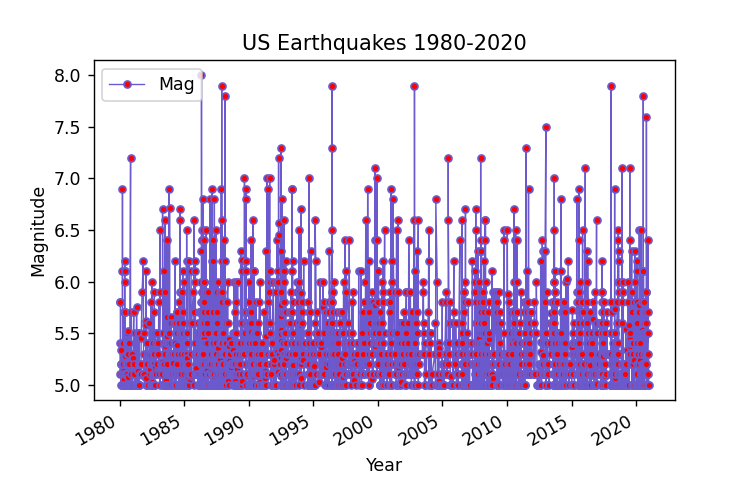

<AxesSubplot:xlabel='Date'>

In [12]:
#Plot the graph by date 
quakes_df.plot(marker='.',
                      ms = 8, mfc = 'r',
                      figsize=(6,4), 
                      linewidth=0.8, 
                      color='slateblue')

In [13]:
plt.title("US Earthquakes 1980-2020")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.plot()

[]

In [14]:
print(f'Number of quakes in US magnitude above 5 in last 40 years :{num_quakes}')

Number of quakes in US magnitude above 5 in last 40 years :2492
